In [ ]:
!pip install tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.4 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=19d7935e5b651e1f1644775a1af751ee53a745390bac7d1ee7fed6e5d5506678
  St

In [ ]:
print('hi')

hi


In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

from official.nlp import optimization
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_science = pd.read_csv('/content/drive/MyDrive/Data_DLS/data_science_jobs_indeed_usa.csv')

data_science.head()

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...


In [ ]:
data_science.head()

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...


In [ ]:
data_science.dtypes

Unnamed: 0        int64
Title            object
Company          object
Location         object
Rating          float64
Date             object
Salary           object
Description      object
Links            object
Descriptions     object
dtype: object

In [ ]:
data_science.columns

Index(['Unnamed: 0', 'Title', 'Company', 'Location', 'Rating', 'Date',
       'Salary', 'Description', 'Links', 'Descriptions'],
      dtype='object')

In [ ]:
tech_jobs = pd.read_csv('/content/drive/MyDrive/Data_DLS/dice_com-job_us_sample.csv')

tech_jobs.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [ ]:
tech_jobs = tech_jobs[['company', 'jobtitle', 'jobdescription']]
tech_jobs.rename(columns = {'company':'Company' ,'jobtitle':'Title', 'jobdescription':'Description'}, inplace = True)
tech_jobs.head()

,Company,Title,Description
0,"Digital Intelligence Systems, LLC",AUTOMATION TEST ENGINEER,Looking for Selenium engineers...must have sol...
1,University of Chicago/IT Services,Information Security Engineer,The University of Chicago has a rapidly growin...
2,"Galaxy Systems, Inc.",Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec..."
3,TransTech LLC,"Java Developer (mid level)- FT- GREAT culture,...",Java DeveloperFull-time/direct-hireBolingbrook...
4,Matrix Resources,DevOps Engineer,Midtown based high tech firm has an immediate ...


In [ ]:
data_science = data_science[['Company', 'Title', 'Description']]
data_science.head()

,Company,Title,Description
0,Driven Brands,Data Scientist,You’ll be working alongside a team of eight an...
1,Sabot Consulting,Business Analyst,Preferred candidates will have prior experienc...
2,Ballad Health,IT Business Intelligence Developer (FT) Remote...,Job Details Apply Save Print this job Email a…
3,Longevity Holdings Inc.,Data Engineer,Incorporate core data management competencies ...
4,WKI Kenworth,Network Administrator/dba developer,The Network Administrator provides 2nd level e...


In [ ]:
data = pd.concat([tech_jobs,data_science])
data

,Company,Title,Description
0,"Digital Intelligence Systems, LLC",AUTOMATION TEST ENGINEER,Looking for Selenium engineers...must have sol...
1,University of Chicago/IT Services,Information Security Engineer,The University of Chicago has a rapidly growin...
2,"Galaxy Systems, Inc.",Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec..."
3,TransTech LLC,"Java Developer (mid level)- FT- GREAT culture,...",Java DeveloperFull-time/direct-hireBolingbrook...
4,Matrix Resources,DevOps Engineer,Midtown based high tech firm has an immediate ...
...,...,...,...
1195,HyperScience,Senior Machine Learning Engineer,We turn ML lab experiments into enterprise-rea...
1196,N9 it solutions,Data Scientist,Experience using a variety of data mining/data...
1197,Marathon TS,Data Engineer,"3 years working with databases, data modeling,..."
1198,Red Ventures,"Director of Data Science and Engineering, RV T...",You will be responsible for overseeing the tea...


In [ ]:
data.dtypes

Company        object
Title          object
Description    object
dtype: object

In [ ]:
#Doing some adjustments
# data["Label"] = data["Label"]

data["Label"] = data["Label"][data['Title'].str.contains("Scientist")] = "0"
data["Label"][data['Title'].str.contains("Analyst")] = "1"
data["Label"][data['Title'].str.contains("Engineer")] = "2"
data["Label"][data['Title'].str.contains("Developer")] = "3"
data["Label"][data['Title'].str.contains("Administrator")] = "4"
data["Label"][data['Title'].str.contains("Manager")] = "5"

data

,Company,Title,Description,Label
0,"Digital Intelligence Systems, LLC",AUTOMATION TEST ENGINEER,Looking for Selenium engineers...must have sol...,0
1,University of Chicago/IT Services,Information Security Engineer,The University of Chicago has a rapidly growin...,2
2,"Galaxy Systems, Inc.",Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec...",0
3,TransTech LLC,"Java Developer (mid level)- FT- GREAT culture,...",Java DeveloperFull-time/direct-hireBolingbrook...,3
4,Matrix Resources,DevOps Engineer,Midtown based high tech firm has an immediate ...,2
...,...,...,...,...
1195,HyperScience,Senior Machine Learning Engineer,We turn ML lab experiments into enterprise-rea...,2
1196,N9 it solutions,Data Scientist,Experience using a variety of data mining/data...,0
1197,Marathon TS,Data Engineer,"3 years working with databases, data modeling,...",2
1198,Red Ventures,"Director of Data Science and Engineering, RV T...",You will be responsible for overseeing the tea...,2


In [ ]:
data.dtypes

Company        object
Title          object
Description    object
Label          object
dtype: object

In [ ]:
data['Label'] = np.asarray(data['Label']).astype("float64")

In [ ]:

# Grouping data by label
data.groupby('Label').count()

,Company,Title,Description
Label,,,
0.0,7995,8019,8019
1.0,2274,2281,2281
2.0,4813,4818,4818
3.0,4957,4963,4963
4.0,898,900,900
5.0,2213,2219,2219


In [ ]:
scientist, analyst, engineer, developer, administrator, manager = np.bincount(data['Label'])
total = scientist + analyst + engineer + developer + administrator + manager
print('Examples:\n    Total: {}\n    Scientist: {} ({:.2f}% of total)\n'.format(
    total, scientist, 100 * scientist / total))
print('Examples:\n    Total: {}\n    Analyst: {} ({:.2f}% of total)\n'.format(
    total, analyst, 100 * analyst / total))
print('Examples:\n    Total: {}\n    Engineer: {} ({:.2f}% of total)\n'.format(
    total, engineer, 100 * engineer / total))
print('Examples:\n    Total: {}\n    Developer: {} ({:.2f}% of total)\n'.format(
    total, developer, 100 * developer / total))
print('Examples:\n    Total: {}\n    Administrator: {} ({:.2f}% of total)\n'.format(
    total, administrator, 100 * administrator / total))
print('Examples:\n    Total: {}\n    Manager: {} ({:.2f}% of total)\n'.format(
    total, manager, 100 * manager / total))

Examples:
    Total: 23200
    Scientist: 8019 (34.56% of total)

Examples:
    Total: 23200
    Analyst: 2281 (9.83% of total)

Examples:
    Total: 23200
    Engineer: 4818 (20.77% of total)

Examples:
    Total: 23200
    Developer: 4963 (21.39% of total)

Examples:
    Total: 23200
    Administrator: 900 (3.88% of total)

Examples:
    Total: 23200
    Manager: 2219 (9.56% of total)



In [ ]:
from sklearn.model_selection import train_test_split
X_train_, X_test, y_train_, y_test = train_test_split(
    data.index.values,
    data.Label.values,
    test_size=0.10,
    random_state=42,
    stratify=data.Label.values,
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    data.loc[X_train_].index.values,
    data.loc[X_train_].Label.values,
    test_size=0.10,
    random_state=42,
    stratify=data.loc[X_train_].Label.values,
)

In [ ]:
data['data_type'] = ['not_set']*data.shape[0]
data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'
data.loc[X_test, 'data_type'] = 'test'

In [ ]:
df_train = data.loc[data["data_type"]=="train"]
df_train.head(5)

,Company,Title,Description,Label,data_type
0,"Digital Intelligence Systems, LLC",AUTOMATION TEST ENGINEER,Looking for Selenium engineers...must have sol...,0.0,train
3,TransTech LLC,"Java Developer (mid level)- FT- GREAT culture,...",Java DeveloperFull-time/direct-hireBolingbrook...,3.0,train
5,Yash Technologies,SAP FICO Architect,We are looking for a Senior SAP FICO Architect...,0.0,train
10,"Maxonic, Inc.",OpenStack Engineer - 12185,JOB DESCRIPTION:As a senior member of the team...,2.0,train
11,CSI (Consultant Specialists Inc.),9001 Data Security Administrator - Unix & IAM,"Must have skills: UNIX, IAM (Identity Access M...",4.0,train


In [ ]:
df_val = data.loc[data["data_type"]=="val"]
df_val.head(5)

,Company,Title,Description,Label,data_type
2,"Galaxy Systems, Inc.",Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec...",0.0,val
4,Matrix Resources,DevOps Engineer,Midtown based high tech firm has an immediate ...,2.0,val
7,"Bluebeam Software, Inc.",Sr. Web Application Developer (Cloud Team) - C...,Bluebeam is looking for talented sr. web devel...,3.0,val
8,Genesis10,Front End Developer,This is a fulltime position for a Javascript d...,3.0,val
9,"VanderHouwen & Associates, Inc.",Application Support Engineer,SummaryOur client is the leading provider of o...,2.0,val


In [ ]:
df_test = data.loc[data["data_type"]=="test"]
df_test.head(5)

,Company,Title,Description,Label,data_type
1,University of Chicago/IT Services,Information Security Engineer,The University of Chicago has a rapidly growin...,2.0,test
6,Noble1,Network Engineer,Network Engineer Job Description A Network Eng...,2.0,test
12,"VanderHouwen & Associates, Inc.",Software Engineer Manager,VanderHouwen has more jobs you may like! Find...,5.0,test
18,Genesis10,Messaging Administrator,Genesis10 is actively seeking a Messaging Admi...,4.0,test
23,Genesis10,IT Quality Consultant,Genesis10 is seeking an IT Quality Consultant ...,0.0,test


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((df_train.Description.values, df_train.Label.values))
val_ds = tf.data.Dataset.from_tensor_slices((df_val.Description.values, df_val.Label.values))
test_ds = tf.data.Dataset.from_tensor_slices((df_test.Description.values, df_test.Label.values))

In [ ]:
train_ds = train_ds.shuffle(len(df_train)).batch(32, drop_remainder=False)
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
val_ds = val_ds.shuffle(len(df_val)).batch(32, drop_remainder=False)
val_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
test_ds = test_ds.shuffle(len(df_test)).batch(32, drop_remainder=False)
test_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
for feat, targ in train_ds.take(1):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [b"Are you comfortable working with VoIP and passionate about telecom work? \xc2\xa0Are you looking for an opportunity in an exciting Fortune 500 environment? \xc2\xa0If so, you should consider TeamSoft's current\xc2\xa0VoIP Network Engineer\xc2\xa0opportunity in Madison, Wisconsin!\xc2\xa0This position will be responsible for designing and implementing new VoIP/SIP solutions and supporting the existing systems. \xc2\xa0Bonus points if you've worked with telecommunication carrier services previously!Well qualified candidates will have the following skills and experience:\xc2\xa0Experience with designing/implementing VoIP/SIP solutions - both inbound toll free services and outbound servicesSession Border Control (SBC) experience is a plus, but not requiredCisco router and switch experience\xc2\xa0WAN experience\xc2\xa0Excellent technical and personal communication skills*A full position description will be provided to qualified candidates.Find out why TeamSoft is the Madison a

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/1',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(1):
    description = text_batch.numpy()[i]
    print(f'Job Description: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label}')

text_test = ['this is a great choice']
text_test = [description]


text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Job Description: b"Systems EngineerThe primary job functions of the systems engineer will be:\xc2\xa0Strong knowledge of Active Directory as well as DNS, DHCP, WINS and IISManage and upgrade network servers, including but not limited to Exchange server cluster and SQL Server cluster environments.Support EMC SAN storage, Citrix Netscaler, and VMWare ESX VSphere virtual server environmentsAdvanced experience with Messaging including MS Exchange, Blackberry Server, Spam Filtering, Archiving and Instant Messaging)Support and manage Microsoft suite of Windows Server, SQL Server, SCCM, Live Communication Server and SharePoint 2010Manage the firm's Cisco Infrastructure environment consisting of Cisco Catalyst, Nexus 7K switches and 2900 series routers as well as Cisco UCS Server platformManage spam filtering via Symantec Cloud solution as well as Web Security Filtering through Websense appliancesManage and maintain servers supporting mission critical business and legal/litigation applications

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.844 -0.708  0.03  -0.331 -0.331  0.995  0.988 -0.965 -0.323 -0.982
  0.219 -0.957]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.01   0.224 -0.195 ... -0.437 -0.036  0.724]
 [-0.143 -0.788 -0.168 ... -0.548 -0.459 -0.062]
 [-0.776 -0.812 -0.208 ... -0.104 -0.815  0.568]
 ...
 [-0.406 -0.79  -0.374 ... -0.601 -0.021  0.025]
 [-0.759 -0.603 -0.34  ... -0.439 -0.091  0.216]
 [-0.813  0.293 -0.503 ...  0.087  0.216  0.664]]


Calculating Class Weights

In [ ]:
weight_for_0 = (1 / scientist)*(total)/6.0
weight_for_1 = (1 / analyst)*(total)/6.0
weight_for_2 = (1 / engineer)*(total)/6.0
weight_for_3 = (1 / developer)*(total)/6.0
weight_for_4 = (1 / administrator)*(total)/6.0
weight_for_5 = (1 / manager)*(total)/6.0


class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 2: {:.2f}'.format(weight_for_3))
print('Weight for class 2: {:.2f}'.format(weight_for_4))
print('Weight for class 2: {:.2f}'.format(weight_for_5))

Weight for class 0: 0.48
Weight for class 1: 1.70
Weight for class 2: 0.80
Weight for class 2: 0.78
Weight for class 2: 4.30
Weight for class 2: 1.74


BERT + CNN Model

In [ ]:
def build_CNN_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    #net = outputs['pooled_output'] # [batch_size, 768].
    net = sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]


    net = tf.keras.layers.Conv1D(32, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)

    net = tf.keras.layers.Conv1D(64, (2), activation='relu')(net)
    #net = tf.keras.layers.MaxPooling1D(2)(net)
    net = tf.keras.layers.GlobalMaxPool1D()(net)

#    net = tf.keras.layers.Flatten()(net)

    net = tf.keras.layers.Dense(512, activation="relu")(net)

    net = tf.keras.layers.Dropout(0.1)(net)
#   net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(6, activation="softmax", name='classifier')(net)

    return tf.keras.Model(text_input, net)

In [ ]:
cnn_classifier_model = build_CNN_classifier_model()
bert_raw_result = cnn_classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.543 0.511 0.593 0.53  0.544 0.528]], shape=(1, 6), dtype=float32)


In [ ]:
cnn_classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

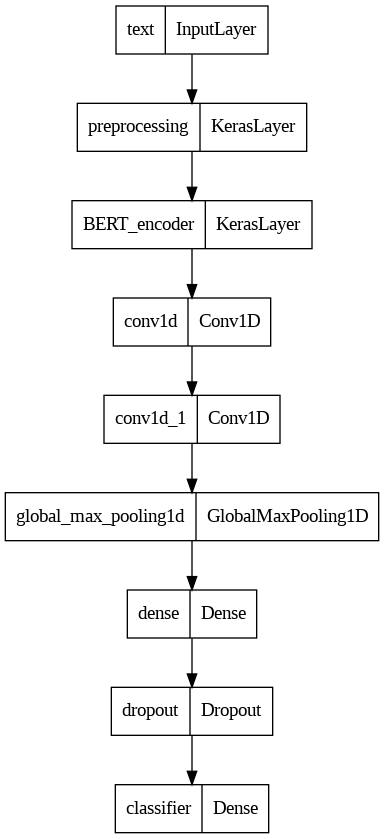

In [ ]:
tf.keras.utils.plot_model(cnn_classifier_model)

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
epochs = 50
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

cnn_classifier_model.compile(optimizer=optimizer,
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
cnn_history = cnn_classifier_model.fit(x=train_ds,
                                       validation_data=val_ds,
                                       epochs=epochs,
                                       class_weight=class_weight
                                      )

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


566/566 [==============================] - 1265s 2s/step - loss: 1.8241 - accuracy: 0.2356 - val_loss: 1.7164 - val_accuracy: 0.3402
Epoch 2/50
566/566 [==============================] - 1235s 2s/step - loss: 1.2330 - accuracy: 0.5092 - val_loss: 0.9502 - val_accuracy: 0.6936
Epoch 3/50
566/566 [==============================] - 1209s 2s/step - loss: 0.7451 - accuracy: 0.7323 - val_loss: 0.8666 - val_accuracy: 0.7215
Epoch 4/50
566/566 [==============================] - 1205s 2s/step - loss: 0.6547 - accuracy: 0.7620 - val_loss: 0.8599 - val_accuracy: 0.7137
Epoch 5/50
566/566 [==============================] - 1200s 2s/step - loss: 0.5895 - accuracy: 0.7811 - val_loss: 0.7510 - val_accuracy: 0.7479
Epoch 6/50
566/566 [==============================] - 1194s 2s/step - loss: 0.5225 - accuracy: 0.8044 - val_loss: 0.7695 - val_accuracy: 0.7560
Epoch 7/50
566/566 [==============================] - 1204s 2s/step - loss: 0.4472 - accuracy: 0.8320 - val_loss: 0.7430 - val_accuracy: 0.7576
Epo

In [ ]:
loss, accuracy = cnn_classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

79/79 [==============================] - 52s 658ms/step - loss: 1.8449 - accuracy: 0.8036
Loss: 1.8448710441589355
Accuracy: 0.8035856485366821


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


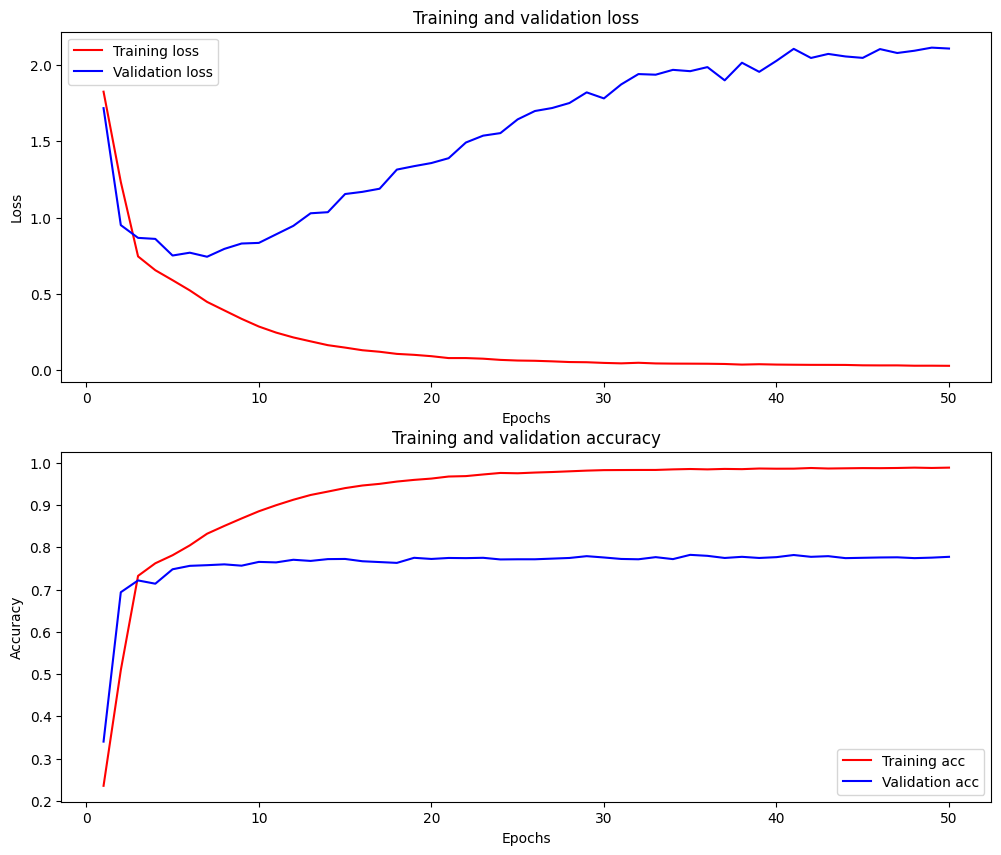

In [ ]:
history_dict = cnn_history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
name = 'cnn'
saved_model_path = './{}_bert'.format(name.replace('/', '_')) # Change the path if necessary

cnn_classifier_model.save(saved_model_path, include_optimizer=False)

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
resume_df = pd.read_csv('/content/drive/MyDrive/Data_DLS/Resume.csv')
resume_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
resume_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:

filter=['INFORMATION-TECHNOLOGY','BUSINESS-DEVELOPMENT','ENGINEERING',
        'CONSULTANT']

In [ ]:

resume_df_filter=resume_df[resume_df['Category'].isin(filter)]

In [ ]:
resume_df_filter=resume_df_filter.reset_index()

In [ ]:
resume_df_filter.drop('index',axis=1,inplace=True)

In [ ]:
resume_df_filter

,ID,Resume_str,Resume_html,Category
0,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
1,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
2,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
3,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
4,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
...,...,...,...,...
468,31694970,INDUSTRIAL ENGINEERING INTERN P...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
469,33685075,"MANAGER, QUALITY ENGINEERING ...","<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
470,77828437,MECHANICAL DESIGN ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
471,35172961,PROCESS ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING


In [ ]:
resume_df_filter['Category'][110]

'INFORMATION-TECHNOLOGY'

In [ ]:
resume_df_filter['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ENGINEERING               118
CONSULTANT                115
Name: Category, dtype: int64

In [ ]:
resume_df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [ ]:
resume_df_filter.shape

(473, 4)

In [ ]:
resume_df_filter['Resume_str'][200]

"         SENIOR BUSINESS DEVELOPMENT MANAGER           Summary     Business development professional experienced in sales management, marketing and applications engineering of filtration and drying systems to the bio-pharmaceuticals, fine chemicals, agro-chemicals, and other industries.        Highlights                    Accomplishments      Supercharged sales of high-valued filtration systems to customers in the bio-pharmaceuticals, specialty chemicals, agro-chemicals, and other industries using consultative selling techniques, to consistently achieve 50%+ year-over-year growth with outstanding gross margins (Heinkel)  Sales/Application Engineer: provided direct sales and application engineering expertise to users of size-reduction, classifying, mixing and drying equipment as well as down-flow/laminar flow booths and active/passive isolation systems to the specialty chemicals, minerals and other industries. Used consultative sales/relationship-building to generate outstanding booki

In [ ]:
1#deployment

import tensorflow as tf
import keras
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/lstm_bert'
model = tf.saved_model.load(path)

In [ ]:
resume_df_filter['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ENGINEERING               118
CONSULTANT                115
Name: Category, dtype: int64

In [ ]:
result = np.argmax(model([resume_df_filter['Resume_str'][1]]))


In [ ]:
result_list=[]

In [ ]:
len(resume_df['Resume_str'])

2484

In [ ]:
len(resume_df_filter['Resume_str'])

473

In [ ]:
resume_df_filter.iloc[:100]

,ID,Resume_str,Resume_html,Category
0,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
1,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
2,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
3,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
4,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
...,...,...,...,...
95,89413122,OPERATIONS RESEARCH ANALYST Sum...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
96,12334140,PRODUCTION ASSOCIATE Summary ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
97,10641230,IT MANAGEMENT Career Overvi...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
98,10265057,WORKING RF SYSTEMS ENGINEER ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY


In [ ]:
resume_df_filter_1_100=resume_df_filter.iloc[:100]
resume_df_filter_2_100=resume_df_filter.iloc[100:200]
resume_df_filter_3_100=resume_df_filter.iloc[200:300]
resume_df_filter_4_100=resume_df_filter.iloc[300:400]
resume_df_filter_5_100=resume_df_filter.iloc[400:]

In [ ]:
resume_df_filter_1_100=resume_df_filter_1_100.reset_index()
resume_df_filter_1_100.drop('index',axis=1,inplace=True)
resume_df_filter_2_100=resume_df_filter_2_100.reset_index()
resume_df_filter_2_100.drop('index',axis=1,inplace=True)
resume_df_filter_3_100=resume_df_filter_3_100.reset_index()
resume_df_filter_3_100.drop('index',axis=1,inplace=True)
resume_df_filter_4_100=resume_df_filter4_100.reset_index()
resume_df_filter_4_100.drop('index',axis=1,inplace=True)
resume_df_filter_5_100=resume_df_filter_5_100.reset_index()
resume_df_filter_5_100.drop('index',axis=1,inplace=True)

In [ ]:
resume_df_filter_5_100

,ID,Resume_str,Resume_html,Category
0,38314236,ENGINEERING SUPERVISOR Summar...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
1,25425322,ENGINEERING MANAGER Core Qual...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
2,55595908,SITE ENGINEERING Career Ove...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
3,28631840,ENGINEERING SPECIALIST Summary ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
4,23438227,ENGINEERING ASSISTANT Profile...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
...,...,...,...,...
68,31694970,INDUSTRIAL ENGINEERING INTERN P...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
69,33685075,"MANAGER, QUALITY ENGINEERING ...","<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
70,77828437,MECHANICAL DESIGN ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
71,35172961,PROCESS ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING


In [ ]:
result_list5=[]
for i in range(len(resume_df_filter_5_100['Resume_str'])):
  result = np.argmax(model([resume_df_filter_5_100['Resume_str'][i]]))
  result_list5.append(result)
  if i%10==0:
    print(i)

0
10
20
30
40
50
60
70


In [ ]:
resume_df_filter_5_100['Pred_Label']=result_list5

In [ ]:
resume_df_filter_5_100

,ID,Resume_str,Resume_html,Category,Pred_Label
0,38314236,ENGINEERING SUPERVISOR Summar...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,2
1,25425322,ENGINEERING MANAGER Core Qual...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,5
2,55595908,SITE ENGINEERING Career Ove...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,1
3,28631840,ENGINEERING SPECIALIST Summary ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,1
4,23438227,ENGINEERING ASSISTANT Profile...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,4
...,...,...,...,...,...
68,31694970,INDUSTRIAL ENGINEERING INTERN P...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,3
69,33685075,"MANAGER, QUALITY ENGINEERING ...","<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,5
70,77828437,MECHANICAL DESIGN ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,2
71,35172961,PROCESS ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,2


In [ ]:
from google.colab import files

resume_df_filter_1_100.to_csv('resume_df_filter_1_100.csv')
files.download('resume_df_filter_1_100.csv')

resume_df_filter_2_100.to_csv('resume_df_filter_2_100.csv')
files.download('resume_df_filter_2_100.csv')

resume_df_filter_3_100.to_csv('resume_df_filter_3_100.csv')
files.download('resume_df_filter_3_100.csv')

resume_df_filter_4_100.to_csv('resume_df_filter_4_100.csv')
files.download('resume_df_filter_4_100.csv')

resume_df_filter_5_100.to_csv('resume_df_filter5_100.csv')
files.download('resume_df_filter5_100.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
resume_df_filter_5_100.shape

(73, 5)

In [ ]:
from google.colab import files

df.to_csv('df_.csv')
files.download('df.csv')

In [ ]:
resume_df['Resume_str'][1]

"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

In [ ]:
result

In [ ]:
# result =  cnn_classifier_model.predict(resume_df['Resume_str'])
result = np.argmax(cnn_classifier_model.predict(resume_df['Resume_str']), axis=-1)
print(result.shape)

78/78 [==============================] - 52s 656ms/step
(2484,)


In [ ]:
result[0:2]


array([4, 0])

In [ ]:
#my resume df
resume_df=pd.read_csv('/content/result_df.csv')

In [ ]:
resume_df

,Unnamed: 0.1,Unnamed: 0,ID,Resume_str,Resume_html,Category,Pred_Label
0,0,0,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
1,1,1,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
2,2,2,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
3,3,3,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
4,4,4,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,5
...,...,...,...,...,...,...,...
468,468,68,31694970,INDUSTRIAL ENGINEERING INTERN P...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,3
469,469,69,33685075,"MANAGER, QUALITY ENGINEERING ...","<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,5
470,470,70,77828437,MECHANICAL DESIGN ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,2
471,471,71,35172961,PROCESS ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,2


In [ ]:
resume_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Resume_str', 'Resume_html',
       'Category', 'Pred_Label'],
      dtype='object')

In [ ]:
resume_df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
resume_df.rename(columns={'Pred_Label': 'Label'}, inplace=True)


In [ ]:
resume_df #this is my resume_df ->Anurag


,ID,Resume_str,Resume_html,Category,Label
0,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
1,21780877,INFORMATION TECHNOLOGY SPECIALIST\tGS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
2,33241454,INFORMATION TECHNOLOGY SUPERVISOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
3,25990239,INFORMATION TECHNOLOGY INSTRUCTOR ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1
4,16899268,INFORMATION TECHNOLOGY MANAGER/ANALYS...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,5
...,...,...,...,...,...
468,31694970,INDUSTRIAL ENGINEERING INTERN P...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,3
469,33685075,"MANAGER, QUALITY ENGINEERING ...","<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,5
470,77828437,MECHANICAL DESIGN ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,2
471,35172961,PROCESS ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,2


In [ ]:
resume_df['Label'] = result
resume_df

,ID,Resume_str,Resume_html,Category,Label
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,4
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,0
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,5
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,0
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,0
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,0
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,5


In [ ]:
resume_df.dtypes

ID              int64
Resume_str     object
Resume_html    object
Category       object
Label           int64
dtype: object

In [ ]:
data.dtypes

Company         object
Title           object
Description     object
Label          float64
data_type       object
dtype: object

In [ ]:
data['Label']=data['Label'].astype(int)
job_match = resume_df.merge(data[['Label', 'Company', 'Title', 'Description']], on = 'Label', how = 'left')


In [ ]:
job_match #My Job_match

,ID,Resume_str,Resume_html,Category,Label,Company,Title,Description
0,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1,"VanderHouwen & Associates, Inc.",Principal Application Analyst-Supply Chain Lawson,VanderHouwen has more jobs you may like! Find...
1,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1,Genesis10,IT Business Analyst,Genesis10 is looking for a Business Analyst fo...
2,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1,"VanderHouwen & Associates, Inc.",Business Systems Analyst,VanderHouwen has more jobs you may like! Find ...
3,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1,Genesis10,Sr. Business Data Analyst,Genesis10 is seeking a Sr. Business Data Analy...
4,36856210,INFORMATION TECHNOLOGY Summar...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,1,Genesis10,Jr Business Analysts,Genesis10's G10 Associates Program is seeking ...
...,...,...,...,...,...,...,...,...
1238843,21629057,ENGINEERING TECHNICIAN/ FIELD SERVICE...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,4,Pittsburgh Pirates,Database Administrator,Monitor and maintain database structure relati...
1238844,21629057,ENGINEERING TECHNICIAN/ FIELD SERVICE...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,4,"Sunixa Solutions, Inc",Database Administrator,"Responsible for the design, development, insta..."
1238845,21629057,ENGINEERING TECHNICIAN/ FIELD SERVICE...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,4,Tech Army,Database Administrator - TA691- REMOTE,Optimizing database access and allocating/re‐a...
1238846,21629057,ENGINEERING TECHNICIAN/ FIELD SERVICE...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,4,Strategic Employment,Database Administrator/Developer,Ability to identify and solve database perform...


In [ ]:
job_match #Keerti Job Match

,ID,Resume_str,Resume_html,Category,Label,Company,Title,Description
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,4,CSI (Consultant Specialists Inc.),9001 Data Security Administrator - Unix & IAM,"Must have skills: UNIX, IAM (Identity Access M..."
1,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,4,Eastridge Workforce Solutions,Windows System Administrator,Windows Systems Administrator The Windows Syst...
2,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,4,Genesis10,Messaging Administrator,Genesis10 is actively seeking a Messaging Admi...
3,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,4,Eastridge Workforce Solutions,System Support Administrator,System Support AdministratorSeeking a part-tim...
4,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,4,Fahrenheit IT Staffing & Consulting,Windows Administrator,"Windowns (SAN, Security) virtual environment, ..."
...,...,...,...,...,...,...,...,...
16209620,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,0,LOCKHEED MARTIN CORPORATION,Data Scientist,Develop custom data models and algorithms to a...
16209621,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,0,Medium,Senior Data Scientist,"Skilled in building machine learning models, i..."
16209622,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,0,LOCKHEED MARTIN CORPORATION,Data Scientist,Develop custom data models and algorithms to a...
16209623,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,0,Anywhere Real Estate Inc,"Sr. Director, Data Science - Remote",Demonstrable experience with machine learning ...


In [ ]:
job_match.Label.value_counts()

5    423829
1    330745
2    226446
3    129038
0     80190
4     48600
Name: Label, dtype: int64

In [ ]:
df_sampled = job_match.groupby('Label').apply(lambda x: x.sample(2000)).reset_index(drop=True)
df_sampled=pd.DataFrame(df_sampled)


In [ ]:
df_sampled.head()

,ID,Resume_str,Resume_html,Category,Label,Company,Title,Description
0,17108676,MECHANICAL ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,0,Robert Half,Robert Half Technology Information Technology ...,Req ID: 153522 Job Type: RecruitingJob Title: ...
1,20566550,ENGINEERING INTERN Personal Sum...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,0,Kforce Inc.,Data Vault - BI,RESPONSIBILITIES:A Kforce client is looking fo...
2,79570655,FRAGRANCE CONSULTANT Licenses...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,0,Kelly IT,IT Quality Assurance Performance Tester,Kelly IT has an opening for a Permanent IT Qua...
3,99714410,CONSULTANT Executive Profil...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,0,"Fusion Solutions, Inc.",Project Coordinator In Bellevue WA,Looking for a project coordinator for a contra...
4,20566550,ENGINEERING INTERN Personal Sum...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,0,INSYS Group,Data Scientist,Insys is working directly with the Hiring Mana...


In [ ]:
df_sampled.Label.value_counts()

0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
Name: Label, dtype: int64

In [ ]:
from google.colab import files

df_sampled.to_csv('job_match.csv')
files.download('job_match.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
job_match.groupby('ID').count()

,Resume_str,Resume_html,Category,Label,Company,Title,Description
ID,,,,,,,
3547447,8019,8019,8019,8019,7995,8019,8019
10001727,8019,8019,8019,8019,7995,8019,8019
10005171,8019,8019,8019,8019,7995,8019,8019
10030015,8019,8019,8019,8019,7995,8019,8019
10041713,8019,8019,8019,8019,7995,8019,8019
...,...,...,...,...,...,...,...
99433371,8019,8019,8019,8019,7995,8019,8019
99561379,8019,8019,8019,8019,7995,8019,8019
99680385,8019,8019,8019,8019,7995,8019,8019
